# Elektrikli Ara√ß Analizi

## Proje Hakkƒ±nda
Bu proje, **Washington Eyaleti'ndeki elektrikli ve hibrit ara√ßlarƒ±n kullanƒ±m oranlarƒ±nƒ±** incelemek ve enerji altyapƒ±sƒ± planlamalarƒ±na y√∂nelik stratejik √∂neriler sunmak amacƒ±yla yapƒ±lmƒ±≈ütƒ±r.

### Ama√ß
1. **Elektrikli ara√ßlarƒ±n ≈üehirler arasƒ± daƒüƒ±lƒ±mƒ±nƒ± analiz etmek.**
2. **Elektrikli ara√ßlar arasƒ±nda en yaygƒ±n markalarƒ± belirlemek.**
3. **Tesla'nƒ±n pazar liderliƒüinin nedenlerini anlamak.**
4. **Enerji altyapƒ±sƒ± yatƒ±rƒ±mlarƒ± i√ßin somut √∂neriler geli≈ütirmek.**


## Veri Seti Hakkƒ±nda

### Kaynak ve Kapsam
Bu proje, Kaggle platformundan alƒ±nmƒ±≈ü **Electric Vehicle Population Data** veri setini kullanmaktadƒ±r. Veri seti, elektrikli ve hibrit ara√ßlarƒ±n ≈üehirler arasƒ± daƒüƒ±lƒ±mƒ±nƒ±, marka ve model pop√ºlerliƒüini ve ara√ß menzillerini analiz etmek i√ßin uygundur.

- **Kaynak:** Washington State Department of Licensing
- **Kapsam:** 
    - Elektrikli ve hibrit ara√ßlar (model, marka, menzil gibi √∂zellikler)
    - Ara√ßlarƒ±n kayƒ±tlƒ± olduƒüu ≈üehir bilgileri
    - Ara√ß t√ºrleri (Plug-in Hybrid Electric Vehicle - PHEV veya Battery Electric Vehicle - BEV)


### Veri Seti Yapƒ±sƒ±
Veri seti toplamda **200.000+ satƒ±r** ve **17 s√ºtun** i√ßermektedir. √ñrnek s√ºtunlar:
- **`Model`**: Aracƒ±n modeli (√∂r. Tesla Model S)
- **`Make`**: √úretici firma (√∂r. Tesla, Nissan)
- **`Electric Range`**: Aracƒ±n tam dolu batarya ile gidebileceƒüi mesafe (mil cinsinden)
- **`City`**: Aracƒ±n kayƒ±tlƒ± olduƒüu ≈üehir (√∂r. Seattle)       |


## √ñl√ßekler
Veri setindeki deƒüi≈ükenlerin anlamlarƒ± ve birimleri:

- **Electric Range (Menzil):** Elektrikli aracƒ±n tam ≈üarjla ka√ß mil gidebildiƒüini ifade eder. 
  - **√ñl√ß√º Birimi:** Mil (1 mil ‚âà 1.609 km)
  - **√ñl√ßek:** S√ºrekli sayƒ±sal bir deƒüi≈üken
- **City (≈ûehir):** Aracƒ±n kayƒ±tlƒ± olduƒüu ≈üehri belirtir. 
  - **√ñl√ßek:** Kategorik deƒüi≈üken
- **Make (Marka):** Elektrikli aracƒ±n √ºreticisini belirtir. 
  - **√ñl√ßek:** Kategorik deƒüi≈üken
- **Electric Vehicle Type (Ara√ß T√ºr√º):** Aracƒ±n Plug-in Hybrid mi yoksa BEV mi olduƒüunu ifade eder. 
  - **√ñl√ßek:** Kategorik deƒüi≈üken


## ƒ∞≈ü Problemi
Proje, elektrikli ara√ßlarƒ±n pop√ºlerliƒüini ve bu pop√ºlerliƒüin sebeplerini anlamak i√ßin ≈üu sorulara cevap arar:
- Elektrikli ara√ßlarƒ±n ≈üehirler arasƒ± daƒüƒ±lƒ±mƒ± nasƒ±ldƒ±r?
- Tesla neden pazarda lider konumdadƒ±r?
- Enerji altyapƒ±sƒ± yatƒ±rƒ±mlarƒ± i√ßin hangi b√∂lgeler √∂nceliklidir?

Bu analiz, enerji sekt√∂r√º oyuncularƒ±na stratejik kararlar almada rehberlik etmeyi hedefler.


In [1]:
import pandas as pd
import numpy as np
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Veri hakkƒ±nda genel bilgi ve √∂zel istatistik incelemesi.

In [2]:
import pandas as pd

file_path = "/kaggle/input/electric-vhicule-population-data/Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

print(df.info())

print("***********************************************")

print(df.head())

print("***********************************************")

print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

In [3]:
import random

# Eksik veriler eklemek i√ßin fonksiyonu kullanalƒ±m
def add_random_missing_values(df: pd.DataFrame, missing_rate= 0.03, seed: random = 42) -> pd.DataFrame:

    # Dataframe'in kopyasini olusturalim
    df_missing = df.copy()

    df_size = df.size
    num_missing = int(df_size * missing_rate)

    # Set seed
    if seed:
        random.seed(seed)

    for _ in range(num_missing):
        row_idx = random.randint(0,df.shape[0] - 1)
        col_idx = random.randint(0,df.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

    



In [4]:
# Eksik verileri ekleme fonksiyonunu kullanalim
df_with_missing = add_random_missing_values(df, missing_rate=0.03)

# Ilk 5 veriyi gozlemleyelim
df_with_missing.head(10)

VIN (1-10)     County       City State  Postal Code  Model Year       Make  \
0  JTMAB3FV3P     Kitsap    Seabeck    WA      98380.0      2023.0     TOYOTA   
1  1N4AZ1CP6J     Kitsap  Bremerton    WA      98312.0      2018.0     NISSAN   
2  5YJ3E1EA4L       King    Seattle    WA      98101.0      2020.0      TESLA   
3  1N4AZ0CP8E       King    Seattle    WA      98125.0      2014.0     NISSAN   
4  1G1FX6S00H   Thurston       Yelm    WA      98597.0      2017.0  CHEVROLET   
5  5YJYGDEE5L  Snohomish   Lynnwood    WA      98036.0      2020.0      TESLA   
6  KM8S6DA23N     Kitsap    Poulsbo    WA      98370.0      2022.0    HYUNDAI   
7  7FCTGAAA1P  Snohomish  Arlington    WA      98223.0      2023.0     RIVIAN   
8  5YJYGDEE9L       King       Kent    WA      98031.0      2020.0      TESLA   
9  1N4AZ0CP2F       King        NaN    WA          NaN      2015.0     NISSAN   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        LEAF          Battery Electric Vehicle (BEV)   
2     MODEL 3          Battery Electric Vehicle (BEV)   
3        LEAF          Battery Electric Vehicle (BEV)   
4     BOLT EV          Battery Electric Vehicle (BEV)   
5     MODEL Y          Battery Electric Vehicle (BEV)   
6    SANTA FE  Plug-in Hybrid Electric Vehicle (PHEV)   
7         R1T          Battery Electric Vehicle (BEV)   
8     MODEL Y          Battery Electric Vehicle (BEV)   
9        LEAF          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible            42.0   
1            Clean Alternative Fuel Vehicle Eligible           151.0   
2                                                NaN           266.0   
3            Clean Alternative Fuel Vehicle Eligible            84.0   
4            Clean Alternative Fuel Vehicle Eligible           238.0   
5            Clean Alternative Fuel Vehicle Eligible           291.0   
6            Clean Alternative Fuel Vehicle Eligible            31.0   
7  Eligibility unknown as battery range has not b...             0.0   
8            Clean Alternative Fuel Vehicle Eligible           291.0   
9            Clean Alternative Fuel Vehicle Eligible            84.0   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0        0.0                  35.0     240684006.0   
1        0.0                   NaN     474183811.0   
2        0.0                  43.0     113120017.0   
3        0.0                  46.0     108188713.0   
4        0.0                  20.0     176448940.0   
5        0.0                  21.0     124511187.0   
6        0.0                  23.0     212217764.0   
7        0.0                  39.0     252414039.0   
8        0.0                  47.0     112668510.0   
9        0.0                  45.0     109765204.0   

                  Vehicle Location  \
0  POINT (-122.8728334 47.5798304)   
1  POINT (-122.6961203 47.5759584)   
2  POINT (-122.3340795 47.6099315)   
3    POINT (-122.304356 47.715668)   
4  POINT (-122.5715761 46.9095798)   
5    POINT (-122.287143 47.812199)   
6  POINT (-122.6368884 47.7469547)   
7     POINT (-122.11597 48.194109)   
8    POINT (-122.201564 47.402358)   
9  POINT (-122.2026532 47.7210518)   

                                Electric Utility  2020 Census Tract  
0                         PUGET SOUND ENERGY INC       5.303509e+10  
1                         PUGET SOUND ENERGY INC       5.303508e+10  
2   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10  
3   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303300e+10  
4                         PUGET SOUND ENERGY INC       5.306701e+10  
5                         PUGET SOUND ENERGY INC       5.306105e+10  
6                         PUGET SOUND ENERGY INC       5.303509e+10  
7                         PUGET SOUND ENERGY INC       5.306105e+10  
8  PUGET SOUND ENERGY INC||CITY OF TACOMA - (W

### Veri setindeki satƒ±r ve sutun sayƒ±larƒ±nƒ± g√∂relim

In [5]:
df.shape

(205439, 17)

In [6]:
# Veri setindeki column'lari gorelim
print(list(df.columns),'\n')

# Toplam kolon sayisini bulalim
print(f"Veri seti icerisindeki toplam kolon sayisi: {len(df.columns)}")

['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract'] 

Veri seti icerisindeki toplam kolon sayisi: 17


## 1.1 Eksik verilerin g√∂rselle≈ütirilmesi

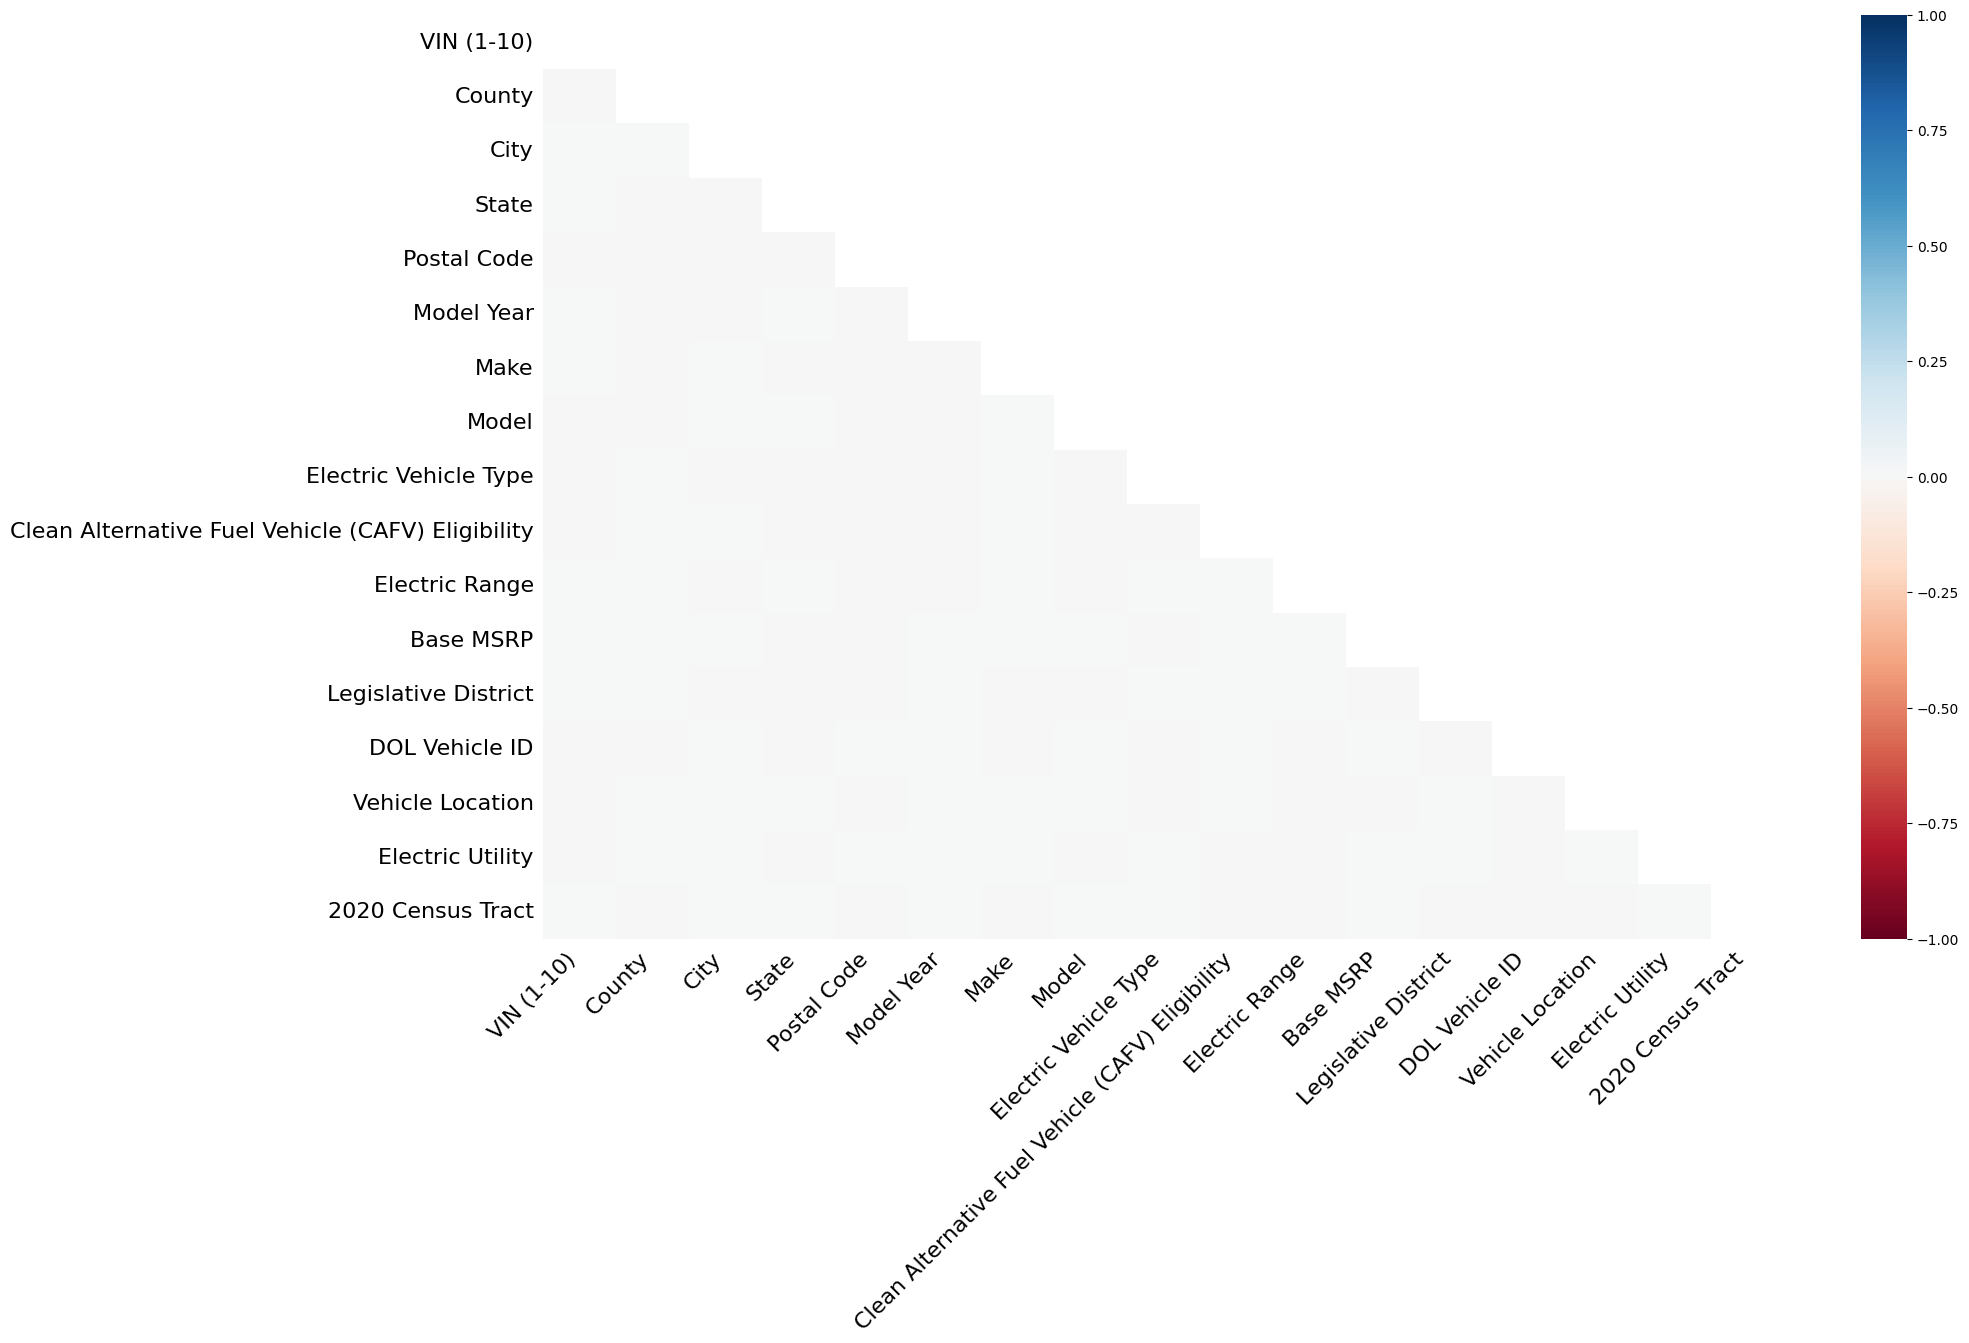

In [7]:
# Kullanilacak kutuphaneleri eklenmesi
import missingno as msno
import matplotlib.pyplot as plt

# Eksik verileri gorsellestirilmesi
msno.heatmap(df_with_missing)
plt.show()


In [8]:
# Sayisal sutunlari se√ßelim.
numeric_columns = df_with_missing.select_dtypes(include = ['float64', 'int64']).columns

# Histogramlari cizdirelim
df_with_missing[numeric_columns].hist(bins = 15, figsize = (7,5))
plt.tight_layout()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

### Korelasyon matrisinin incelenmesi

In [9]:
# Gerekli kutuphanenin eklenmesi
import seaborn as sns

# Korelasyon matrisini hesaplayalim
corr_matrix = df_with_missing[numeric_columns].corr()

# Korelasyon matrisini gorsellestirelim
plt.figure(figsize = (7,5))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.1f', linewidths = 0.2)
plt.title("Correlation Matrix")
plt.show()

# 2. Eksik Verilerin Y√∂netimi

### Eksik veri y√∂netiminde projenin amacƒ± g√∂z √∂n√ºnde bulundurulmalƒ±dƒ±r. Veri temizleme i≈ülemlerinin analizin sonucunu manip√ºle etmemesi i√ßin dikkat edilmesi gereken husular vardƒ±r.

## 2.1 Verilerin √∂nemini anlamak
### Eksik verilerin bulunduƒüu bazƒ± s√ºt√ºnlar bizim projemiz i√ßin kritiktir. Bu s√ºt√ºnlar belirlenmelidir.

## 2.2 Eksik Veri Oranƒ± Etkisi
### Eƒüer bir s√ºt√ºnda eksik veri oranƒ± √ßok y√ºksekse(Ben kendi projem i√ßin bu oranƒ± y√ºzde 50 olarak se√ßtim) bu s√ºt√ºnun tamamƒ±nƒ± silmek mnatƒ±klƒ±dƒ±r. Ancak bu oran d√º≈ü√ºkse bu deƒüerleri doldurmak daha mantƒ±klƒ± olacaktƒ±r.

In [10]:
# Eksik veri oranlarƒ±nƒ± inceliyorum.
missing_info = pd.DataFrame({'Eksik Deger Sayisi': df_with_missing.isnull().sum(),
                            'Eksik Veri Orani (%)': (df_with_missing.isnull().sum() / len(df_with_missing)) * 100})

# Kritik ve ikincil kritik sutunlari belirliyorum
critical_columns = ['Electric Range', 'Base MSRP', 'Make', 'Model']
secondary_columns = ['Postal Code', '2020 Census Tract']

print(missing_info)

                                                   Eksik Deger Sayisi  \
VIN (1-10)                                                       6073   
County                                                           6088   
City                                                             6052   
State                                                            6154   
Postal Code                                                      6174   
Model Year                                                       6088   
Make                                                             6029   
Model                                                            6051   
Electric Vehicle Type                                            6026   
Clean Alternative Fuel Vehicle (CAFV) Eligibility                6050   
Electric Range                                                   5990   
Base MSRP                                                        6019   
Legislative District                               

# 3. Eksik Verilerin Silinmesi

### Eksik veri oranlarƒ±nƒ± yukarda inceledik. Eƒüer verimizde ki  s√ºtun eksikliƒüi oransal olarak y√ºzde 50'den fazla olsaydƒ± s√ºtun bazƒ±nda silme yapacaktƒ±k. Ama %3 gibi √ßok k√º√ß√ºk bir oran olduƒüu i√ßin s√ºtun bazƒ±nda silme sonucu tam olarak g√∂rmemizi engeller.
### Satƒ±rlarda ise y√ºzde 15'den fazla eksik veri i√ßeriyorsa o satƒ±rƒ± silebiliriz.
### Neden %15?
#### %3 gibi √ßok k√º√ß√ºk bir oranda veri bo≈üluƒüumuz varken veriyi en etkli ≈üekilde analiz etmek i√ßin %15 deƒüeri se√ßilmi≈ütir.
#### Hem veri setindeki bilgi kaybƒ±nƒ± minimize etmek hem de analiz sonu√ßlarƒ±nƒ± doƒüru tutmak i√ßin dengeli bir e≈üik deƒüer olarak se√ßilmi≈ütir.
#### Bu karar, hem eksik verilerin analiz sonu√ßlarƒ±nƒ± manip√ºle etme riskini azaltƒ±r hem de elimizdeki veri ile g√ºvenilir √ßƒ±karƒ±mlar yapmamƒ±zƒ± saƒülar.

In [11]:
# Satir bazinda eksik veri orani hesaplanmasi
row_missing_ratios = df_with_missing.isnull().mean(axis=1)

#Esik degerini belirleyelim
threshold = 0.15

#Eksik veri orani esik degeri asan satirlari silelim
rows_to_drop = row_missing_ratios[row_missing_ratios > threshold].index
df_cleaned = df_with_missing.drop(index=rows_to_drop)

print(f"Silinen satir sayisi: {len(rows_to_drop)}")
print(f"Kalan satir sayisi: {df_cleaned.shape[0]}")

Silinen satir sayisi: 2662
Kalan satir sayisi: 202777


# 4. Eksik Verilerin Doldurulmasƒ±

## 4.1 Kategorik Deƒüi≈ükenlerin Doldurulmasi

### Kategorik deƒüi≈ükenleri doldurmak i√ßin mod deƒüerini kullanmaya karar verdik. Bu projede mod deƒüeri kullanarak doldurma i≈ülemini ger√ßekle≈ütireceƒüiz.

* County
* City
* State
* Make
* Model
* Electric Vehicle Type
* Clean Alternative Fuel Vehicle (CAFV) Eligibility
* Electric Utility
### Bu s√ºtunlar, √ßoƒüunlukla kategorik veri i√ßeriyor. Mod (en sƒ±k tekrar eden deƒüer) ile dolduracaƒüƒ±z.

In [12]:
# Doldurulmamis halinin kopyasini alalim
df_before_cat_filling = df_with_missing.copy()

In [13]:
# Kategorik sutunlari secelim
categorical_columns = [
    'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility'
]


# Her kategorik sutundaki eksik veriyi mod ile dolduruyoruz
for column in categorical_columns:
    most_frequent = df_with_missing[column].mode()[0]
    df_with_missing[column].fillna(most_frequent, inplace=True)

#Sonuclari kontrol ediyoruz
print("Kategorik veriler dolduruldu, eksik veri orani: ")
print(df_with_missing[categorical_columns].isnull().mean() * 100)

Kategorik veriler dolduruldu, eksik veri orani: 
County                                               0.0
City                                                 0.0
State                                                0.0
Make                                                 0.0
Model                                                0.0
Electric Vehicle Type                                0.0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.0
Electric Utility                                     0.0
dtype: float64


In [14]:
# Doldurulan s√ºtunlarda en sƒ±k deƒüerleri inceleme
for column in ['County', 'City', 'State', 'Make', 'Model', 
               'Electric Vehicle Type', 
               'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
               'Electric Utility']:
    print(f"{column}:")
    print(df[column].value_counts(normalize=True).head(3))  # ƒ∞lk 3 deƒüeri g√∂ster
    print()


County:
County
King         0.512262
Snohomish    0.120334
Pierce       0.078842
Name: proportion, dtype: float64

City:
City
Seattle     0.162231
Bellevue    0.049821
Redmond     0.035734
Name: proportion, dtype: float64

State:
State
WA    0.997849
CA    0.000565
VA    0.000282
Name: proportion, dtype: float64

Make:
Make
TESLA        0.439634
CHEVROLET    0.073569
NISSAN       0.070702
Name: proportion, dtype: float64

Model:
Model
MODEL Y    0.211436
MODEL 3    0.156315
LEAF       0.065655
Name: proportion, dtype: float64

Electric Vehicle Type:
Electric Vehicle Type
Battery Electric Vehicle (BEV)            0.786311
Plug-in Hybrid Electric Vehicle (PHEV)    0.213689
Name: proportion, dtype: float64

Clean Alternative Fuel Vehicle (CAFV) Eligibility:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    0.555746
Clean Alternative Fuel Vehicle Eligible                         0.340812
Not eligible due to low battery range  

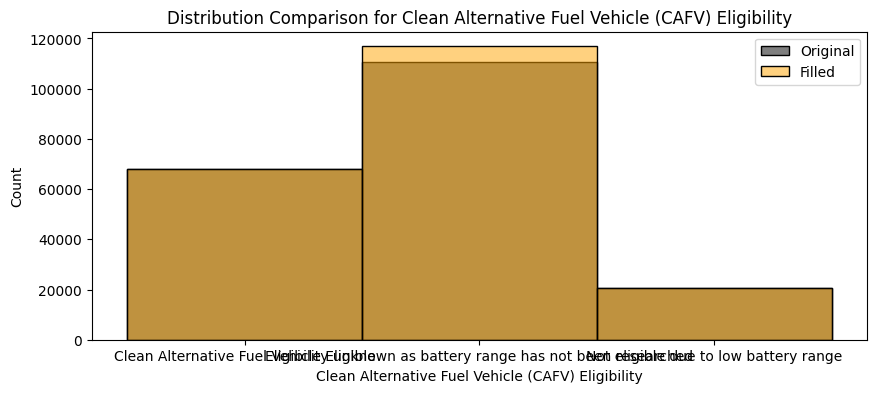

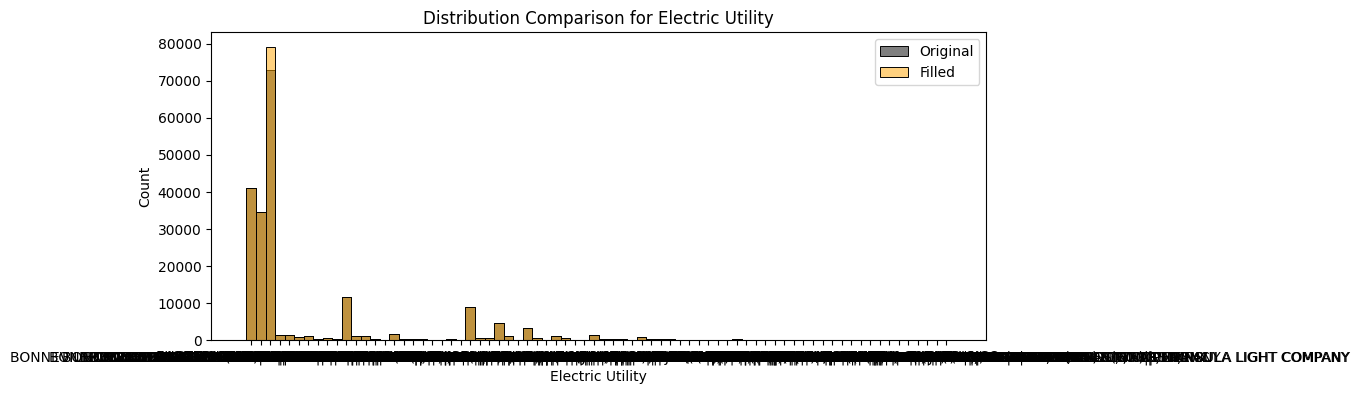

In [15]:
# Eksik verileri doldurmadan √∂nce ve sonrasinin kiyaslanmasi
filled_columns = ['County', 'City', 'State', 'Make', 'Model', 
               'Electric Vehicle Type', 
               'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
               'Electric Utility']

for column in filled_columns:
    plt.figure(figsize=(10,4))
    sns.histplot(df_before_cat_filling[column], color='black', alpha = 0.5, label='Original')
    sns.histplot(df_with_missing[column], color='orange', alpha = 0.5, label='Filled')
    plt.title(f"Distribution Comparison for {column}")
    plt.legend()
    plt.show()

## 4.2 Numerik S√ºtunlardaki Verilerin Doldurulmasƒ±



## 4.2.1 Eksik Veri ƒ∞√ßeren S√ºtunlarƒ±n Belirlenmesi
#### Eksik veri oranlarƒ±nƒ± tekrar kontrol edelim. Sonrasƒ±nda hangi sayƒ±sal s√ºtunlarda i≈ülme yapmamƒ±z gerektiƒüini belirleyelim.

In [16]:
# Sayisal sutunlardaki eksik verileri kontrol ediyoruz
numerical_cols = df_with_missing.select_dtypes(include=['float64','int64']).columns
print(df_with_missing[numerical_cols].isnull().sum())

Postal Code             6174
Model Year              6088
Electric Range          5990
Base MSRP               6019
Legislative District    6481
DOL Vehicle ID          6060
2020 Census Tract       6108
dtype: int64


## 4.2.2 Doldurma Y√∂ntemine Karar Verilmesi
Sayƒ±sal verileri doldurmak i√ßin ortalama, medyan kullanƒ±labilir. 
- Ortalama(Mean): Normal daƒüƒ±lƒ±ma yakƒ±n veriler i√ßin uygundur.
- Medyan(Median): Saƒü ya da sol kuyruk daƒüƒ±lƒ±ma sahip veriler i√ßin kullanƒ±lmasƒ± daha uygundur.

Sayƒ±sal s√ºtunlarƒ±n histogramlarƒ±nƒ± √ßizerek hangi y√∂ntemin uygun olduƒüunu analiz etmeliyiz.

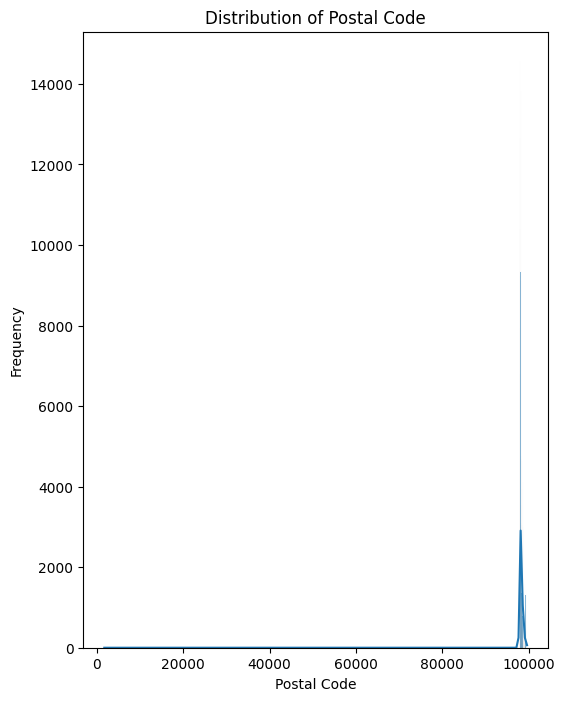

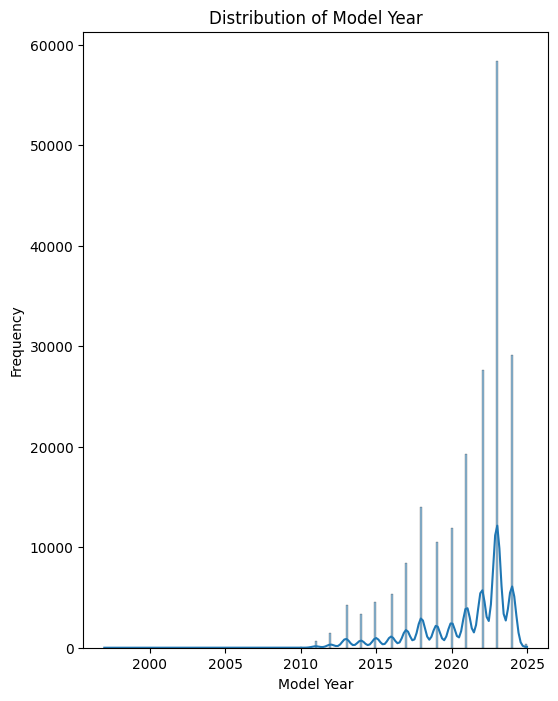

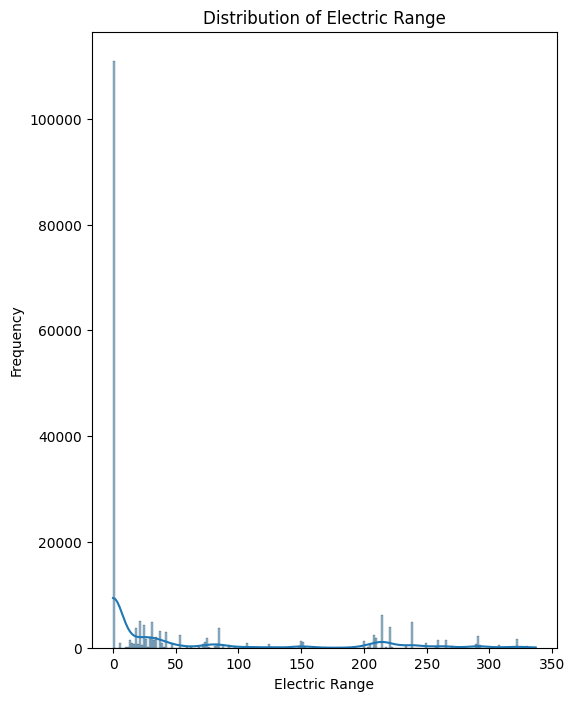

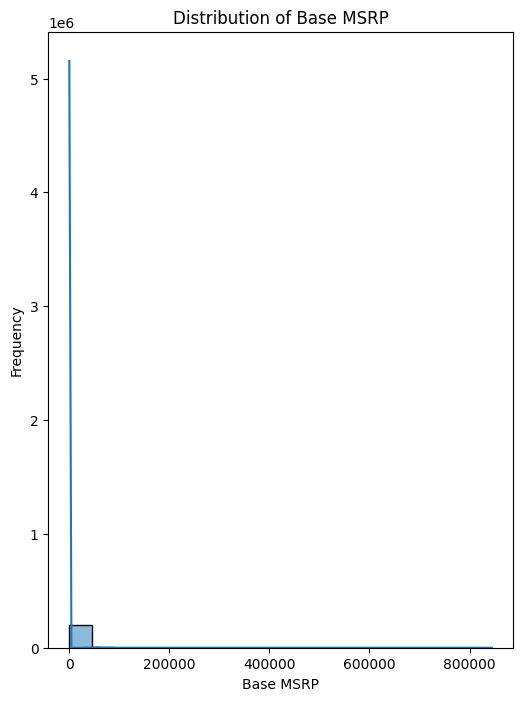

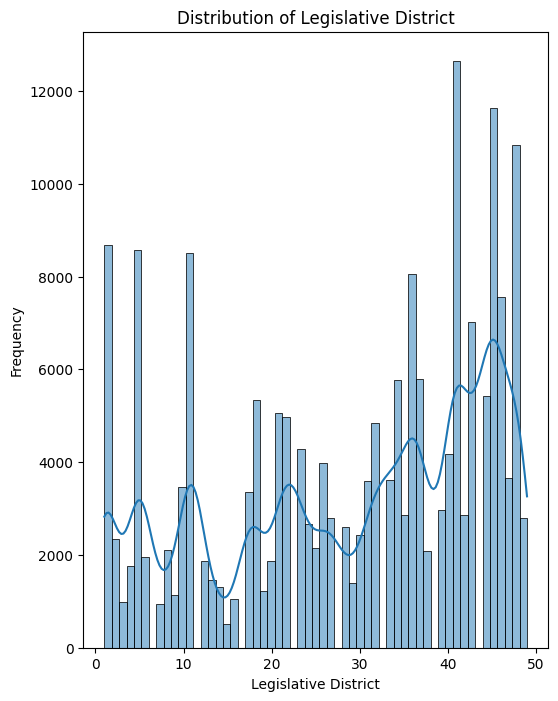

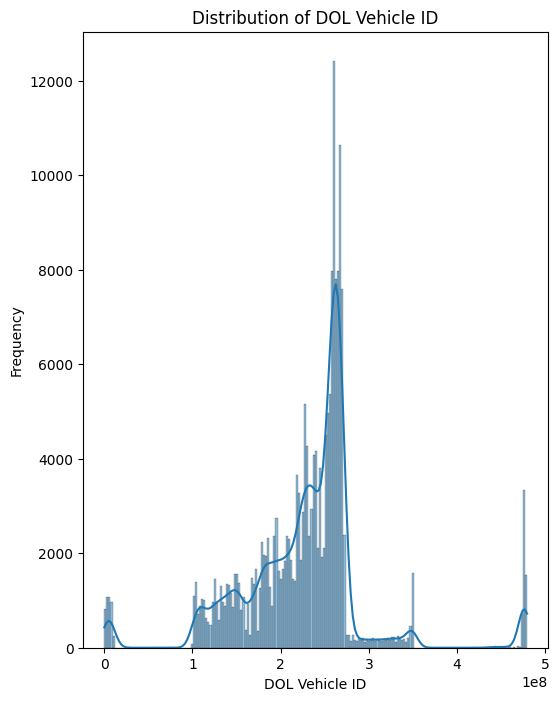

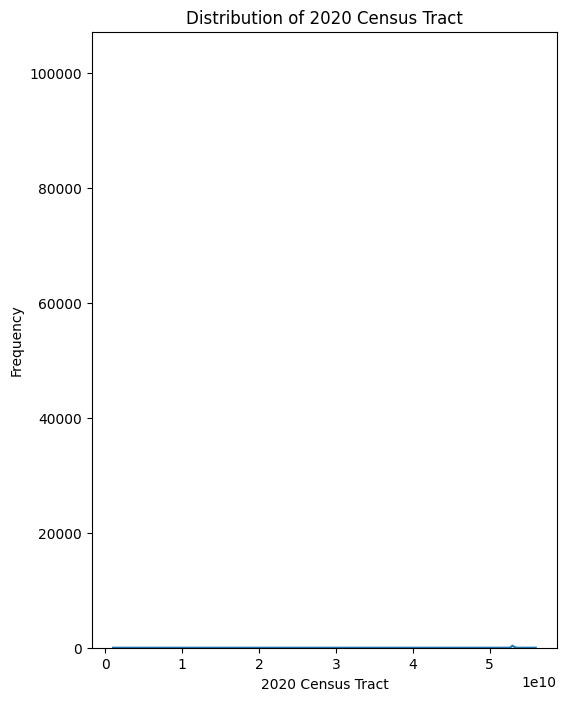

In [17]:
# Sayisal sutunlarin dagilimini inceliyoruz
for col in numerical_cols:
    plt.figure(figsize=(6,8))
    sns.histplot(df_with_missing[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

#### Her bir s√ºtun i√ßin histogramlarƒ±mƒ±zƒ± elde ettik. ≈ûimdi hangi s√ºtunu nasƒ±l dolduracaƒüƒ±mƒ±za dair kararlarƒ±mƒ±zƒ± alabiliriz.
#### Postal Code ve Base MSRP deƒüerleri normal deƒüere yakƒ±n daƒüƒ±lƒ±m sergilediƒüi i√ßin ortalama deƒüer ile doldurulacaktƒ±r.
#### Diƒüer s√ºtunlar ise saƒüa veya sola doƒüru kuyruk daƒüƒ±lƒ±mƒ±na sahip olduƒüu i√ßin medyan deƒüerleri ile doldurulacaktƒ±r.

In [18]:
# Numerik doldurma yapmadan √∂nce verilerimizin kopyasƒ±nƒ± alalƒ±m.
df_before_num_filling = df_with_missing.copy()

#### Ortalama deƒüer ile doldurulacak s√ºtunlar
#### *Postal Code
#### *Base MSRP   

In [19]:
# Postal Code sutununun ortalama deger ile doldurulmasi
df_with_missing['Postal Code'] = df_with_missing['Postal Code'].fillna(df_with_missing['Postal Code'].mean())

# Base MSRP sutununun ortalama deger ile doldurulmasi
df_with_missing['Base MSRP'] = df_with_missing['Base MSRP'].fillna(df_with_missing['Base MSRP'].mean())



#### Medyan ile doldurulacak s√ºtunlar
#### *Model Year
#### *Electric Range
#### *Legislative District  
#### *DOL Vehicle ID      
#### *2020 Census Tract

In [20]:
# Model Year sutununun medyan degeri ile doldurulmasi
df_with_missing['Model Year'] = df_with_missing['Model Year'].fillna(df_with_missing['Model Year'].median())

# Electric Range sutununun medyan degeri ile doldurulmasi 
df_with_missing['Electric Range'] = df_with_missing['Electric Range'].fillna(df_with_missing['Electric Range'].median())

# Legislative District sutununun medyan degeri ile doldurulmasi
df_with_missing['Legislative District'] = df_with_missing['Legislative District'].fillna(df_with_missing['Legislative District'].median())

# DOL Vehicle ID sutununun medyan degeri ile doldurulmasi
df_with_missing['DOL Vehicle ID'] = df_with_missing['DOL Vehicle ID'].fillna(df_with_missing['DOL Vehicle ID'].median())

# 2020 Census Tract sutununun ortalama deger ile doldrurulmasi
df_with_missing['2020 Census Tract'] = df_with_missing['2020 Census Tract'].fillna(df_with_missing['2020 Census Tract'].median())


In [21]:
# Doldurma i≈ülemi ger√ßekle≈ümi≈ü mi kontrol edelim
print(df_with_missing[numerical_cols].isnull().sum())

Postal Code             0
Model Year              0
Electric Range          0
Base MSRP               0
Legislative District    0
DOL Vehicle ID          0
2020 Census Tract       0
dtype: int64


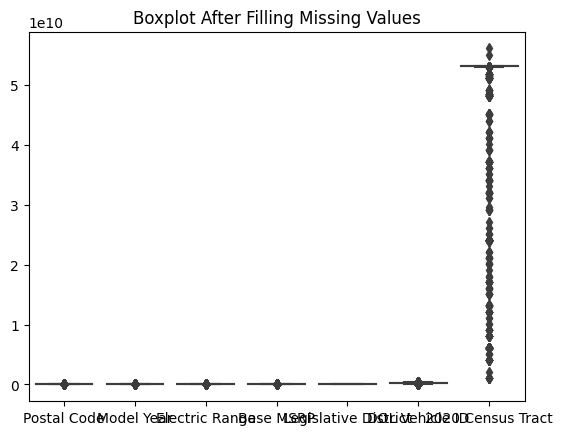

In [22]:
sns.boxplot(data=df_with_missing[numerical_cols])
plt.title("Boxplot After Filling Missing Values")
plt.show()

## 4.2.3 Sƒ±fƒ±r Deƒüeri ƒ∞√ßeren S√ºtunlarƒ±n Belirlenmesi

"0" deƒüerleri genellikle eksik veya anlamlƒ± bir bilgi ta≈üƒ±mayan deƒüerler olabilir ve analiz sonu√ßlarƒ±nƒ± yanƒ±ltabilir. Bu y√ºzden, bu deƒüerlerin kontrol edilmesi ve uygun ≈üekilde d√ºzeltilmesi olduk√ßa √∂nemlidir.

In [23]:
# Sifir deƒüerlerinin tespitini yapiyoruz
numeric_columns = df_with_missing.select_dtypes(include=['float64', 'int64']).columns
zero_values_count = (df_with_missing[numeric_columns] == 0).sum()

print("Sutunlarda sifir degerinin sayisi: ")
print(zero_values_count[zero_values_count > 0])

Sutunlarda sifir degerinin sayisi: 
Electric Range    116893
Base MSRP         196211
dtype: int64


## 4.2.3.1 Marka ve Model Bazlƒ± Kontrol

Her bir marka ve model i√ßin Base MSRP ve Electric Range s√ºtunlarƒ±nƒ±n sƒ±fƒ±r olup olmadƒ±ƒüƒ±nƒ± kontrol edelim.



In [24]:
# Marka ve model bazƒ±nda sifir deƒüerlerini kontrol ediyoruz.
zero_check = df_with_missing[df_with_missing[['Base MSRP', 'Electric Range']].eq(0).any(axis=1)] \
    .groupby(['Make', 'Model'])[['Base MSRP', 'Electric Range']] \
    .size().reset_index(name='Zero Count')

print("Marka ve modele g√∂re sifir deƒüeri olan ara√ßlar:")
print(zero_check)


Marka ve modele g√∂re sifir deƒüeri olan ara√ßlar:
           Make    Model  Zero Count
0         ACURA      ZDX          31
1    ALFA ROMEO  MODEL Y           3
2    ALFA ROMEO   TONALE          70
3          AUDI       A3         511
4          AUDI     A7 E           7
..          ...      ...         ...
290       VOLVO      S90          36
291       VOLVO      V60          64
292       VOLVO     XC40        1060
293       VOLVO     XC60        1036
294       VOLVO     XC90        1456

[295 rows x 3 columns]


## 4.2.3.2 Marka ve Model Bazlƒ± Doldurma ƒ∞≈ülemi

Marka ve modelleri baz alarak sƒ±fƒ±r i√ßeren deƒüerleri dolduruyoruz.

- Eƒüer o marka ve o modelde ba≈üka bir aracƒ±n verisi girilmi≈ü ise sƒ±fƒ±r deƒüerinin yerine belirlenen deƒüeri dolduracaƒüƒ±z.
- Eƒüer o marka ve o modele ait hi√ßbir veri bulunmamƒ±≈üsa o s√ºtunun ortalamasƒ± ile dolduracaƒüƒ±z. 

In [25]:
# Ortalama degerleri hesaplayalim
overall_base_msrp_mean = df_with_missing[df_with_missing['Base MSRP'] != 0]['Base MSRP'].mean()
overall_electric_range_mean = df_with_missing[df_with_missing['Electric Range'] != 0]['Electric Range'].mean()

In [26]:
# Marka ve modele gore sifir olmayan ortalamalari hesaplayalim
base_msrp_averages = df_with_missing[df_with_missing['Base MSRP'] != 0].groupby(['Make', 'Model'])['Base MSRP'].mean()
electric_range_averages = df_with_missing[df_with_missing['Electric Range'] != 0].groupby(['Make', 'Model'])['Electric Range'].mean()

In [27]:
df_before_num_zero_filling = df_with_missing.copy()

In [28]:
# Sifir olan Base MSRP degerlerini dolduralim
df_with_missing['Base MSRP'] = df_with_missing.apply(
    lambda row: base_msrp_averages.get((row['Make'], row['Model']), overall_base_msrp_mean) 
                if row['Base MSRP'] == 0 else row['Base MSRP'], axis=1)

# Sifir olan Electric Range degerlerini dolduralim
df_with_missing['Electric Range'] = df_with_missing.apply(
    lambda row: electric_range_averages.get((row['Make'], row['Model']), overall_electric_range_mean) 
                if row['Electric Range'] == 0 else row['Electric Range'], axis=1)


In [29]:
# 5. Sonuclari kontrol et
print("Base MSRP'de sƒ±fƒ±r kalan deƒüerler:", (df_with_missing['Base MSRP'] == 0).sum())
print("Electric Range'de sƒ±fƒ±r kalan deƒüerler:", (df_with_missing['Electric Range'] == 0).sum())


Base MSRP'de sƒ±fƒ±r kalan deƒüerler: 0
Electric Range'de sƒ±fƒ±r kalan deƒüerler: 0


In [30]:
# Doldurulan √∂rnekleri g√∂rmek i√ßin birka√ß satƒ±r g√∂ster
print(df_with_missing.head(10))

   VIN (1-10)     County       City State   Postal Code  Model Year  \
0  JTMAB3FV3P     Kitsap    Seabeck    WA  98380.000000      2023.0   
1  1N4AZ1CP6J     Kitsap  Bremerton    WA  98312.000000      2018.0   
2  5YJ3E1EA4L       King    Seattle    WA  98101.000000      2020.0   
3  1N4AZ0CP8E       King    Seattle    WA  98125.000000      2014.0   
4  1G1FX6S00H   Thurston       Yelm    WA  98597.000000      2017.0   
5  5YJYGDEE5L  Snohomish   Lynnwood    WA  98036.000000      2020.0   
6  KM8S6DA23N     Kitsap    Poulsbo    WA  98370.000000      2022.0   
7  7FCTGAAA1P  Snohomish  Arlington    WA  98223.000000      2023.0   
8  5YJYGDEE9L       King       Kent    WA  98031.000000      2020.0   
9  1N4AZ0CP2F       King    Seattle    WA  98178.282373      2015.0   

        Make       Model                   Electric Vehicle Type  \
0     TOYOTA  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1     NISSAN        LEAF          Battery Electric Vehicle (BEV)   
2      TESLA  

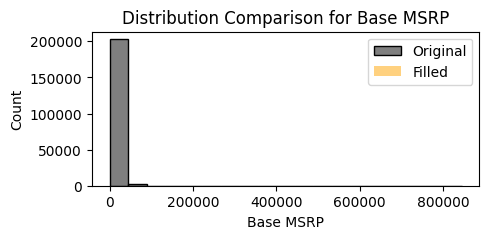

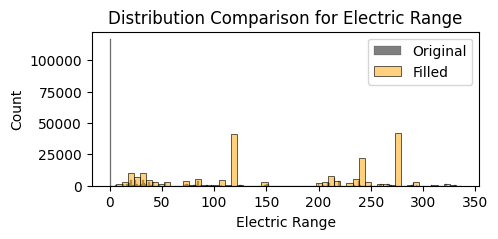

In [31]:
# Eksik verileri doldurmadan √∂nce ve sonrasinin kiyaslanmasi
filled_columns = ['Base MSRP', 'Electric Range']

for column in filled_columns:
    plt.figure(figsize=(5,2))
    sns.histplot(df_before_num_zero_filling[column], color='black', alpha = 0.5, label='Original')
    sns.histplot(df_with_missing[column], color='orange', alpha = 0.5, label='Filled')
    plt.title(f"Distribution Comparison for {column}")
    plt.legend()
    plt.show()

# 5. Sonu√ß Analizlerinin Yapƒ±lmasƒ±

## 5.1 ≈ûehir Bazlƒ± Elektrikli Ara√ß Daƒüƒ±lƒ±mƒ± Analizi
### Bu analiz s√ºrecimizde ≈üehirlerin adƒ±nƒ± i√ßeren s√ºtunu kullanarak ara√ß sayƒ±larƒ±nƒ± gruplandƒ±racaƒüƒ±z ve bu bilgiyi bar grafik ile g√∂rselle≈ütireciz.
### Her ≈üehirdeki ara√ß sayƒ±sƒ±nƒ± hesaplayacaƒüƒ±z.
### Ara√ß sayƒ±larƒ±nƒ± en y√ºksekten en d√º≈ü√ºƒüe doƒüru sƒ±ralayacaƒüƒ±z.
### ƒ∞lk 10 ≈üehri se√ßerek bir bar grafiƒüi √ßizeceƒüiz ve yoƒüunluƒüun en fazla olduƒüu ≈üehirleri g√∂receƒüiz.

### T√ºm d√ºnya i√ßin gerekli analizin yapƒ±lmasƒ±

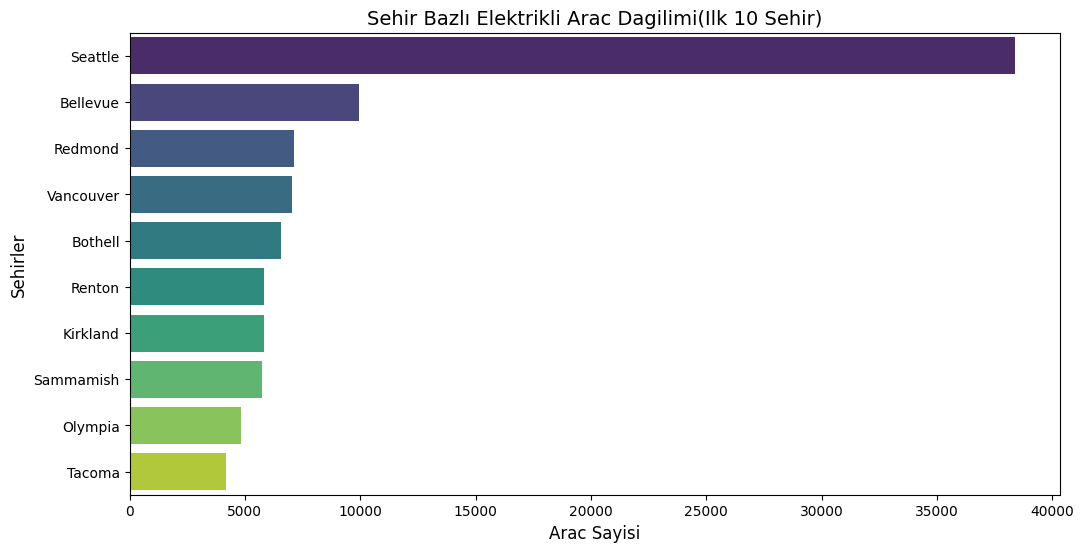

In [32]:
# Sehir bazƒ±nda arac sayilarini gruplandiriyoruz
city_counts = df_with_missing['City'].value_counts()

# Ilk 10 sehri seciyoruz
top_10_cities = city_counts.head(10)

#Gorsellestirme
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')
plt.title('Sehir Bazlƒ± Elektrikli Arac Dagilimi(Ilk 10 Sehir)',fontsize=14)
plt.xlabel('Arac Sayisi',fontsize=12)
plt.ylabel('Sehirler', fontsize=12)
plt.show()

### Yaptƒ±ƒüƒ±mƒ±z analizden elde edilen ilk verilere g√∂re Seattle en yakƒ±n rakibi olan Bellevue ≈üehrine oranla 4 kat daha fazla elektrikli ara√ß kullanƒ±mƒ±na sahip. Bu y√ºzden analizimize Seattle ≈üehrinin √ºst√ºnden devam edeceƒüiz.
### Bu ≈üehirde kullanƒ±lan ara√ßlarƒ±n Elektrikli ara√ß tipi, Marka ve Model gibi √∂zel nitelikleri √ºzerinden analizler yapacaƒüƒ±z.

In [33]:
# Seattle ve diger sehirleri ayiriyoruz.
seattle_df = df_with_missing[df_with_missing['City'] == 'Seattle']
other_cities_df = df_with_missing[df_with_missing['City'] != 'Seattle']

In [34]:
# Seattle sehrindeki araclarin turlerini ve markalarini inceliyoruz
seattle_ev_type = seattle_df['Electric Vehicle Type'].value_counts()
seattle_make = seattle_df['Make'].value_counts()

# Diger sehirlere de bu islemleri yapiyoruz
other_cities_ev_type = other_cities_df['Electric Vehicle Type'].value_counts()
other_cities_make = other_cities_df['Make'].value_counts()

# Sonuclari Yazdiriyoruz
print("Seattle - Elektrikli Arac Turleri: ",seattle_ev_type)
print("Seattle - Marka Dagilimi: ",seattle_make)

print("Diger Sehirler - Elektrikli Arac Turleri: ",other_cities_ev_type)
print("Diger Sehirler - Marka Dagilimi: ",other_cities_make)

Seattle - Elektrikli Arac Turleri:  Electric Vehicle Type
Battery Electric Vehicle (BEV)            30857
Plug-in Hybrid Electric Vehicle (PHEV)     7535
Name: count, dtype: int64
Seattle - Marka Dagilimi:  Make
TESLA             15835
NISSAN             3076
CHEVROLET          2844
BMW                1924
KIA                1736
FORD               1665
TOYOTA             1468
VOLVO              1433
VOLKSWAGEN         1432
HYUNDAI            1379
RIVIAN             1140
AUDI               1028
JEEP                502
CHRYSLER            431
POLESTAR            335
MERCEDES-BENZ       319
MINI                316
FIAT                227
PORSCHE             214
HONDA               177
MITSUBISHI          150
SUBARU              147
LEXUS               108
MAZDA                96
CADILLAC             89
LUCID                66
SMART                56
GENESIS              46
JAGUAR               38
FISKER               31
LINCOLN              24
DODGE                24
ALFA ROMEO          

### Bu analiz sonucunu g√∂rsel olarak g√∂relim

Text(0, 0.5, 'Adet')

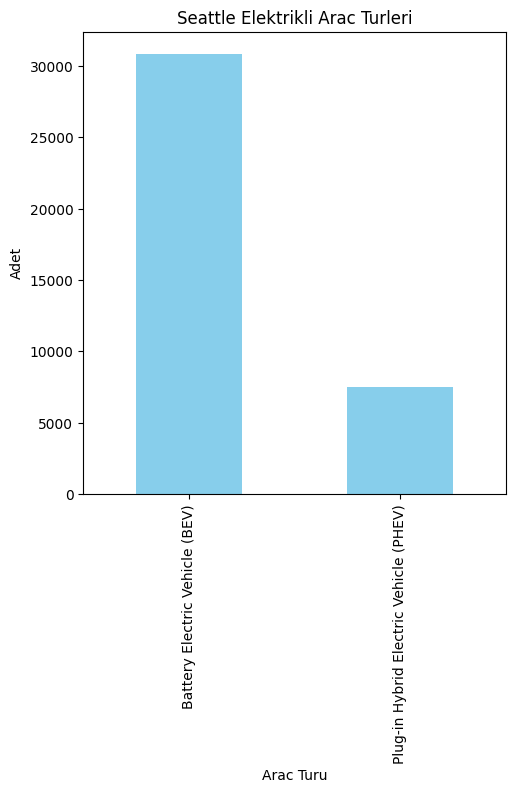

In [35]:
plt.figure(figsize=(12,6))

# Seattle icin grafik
plt.subplot(1,2,1)
seattle_ev_type.plot(kind='bar', color='skyblue')
plt.title('Seattle Elektrikli Arac Turleri')
plt.xlabel('Arac Turu')
plt.ylabel('Adet')

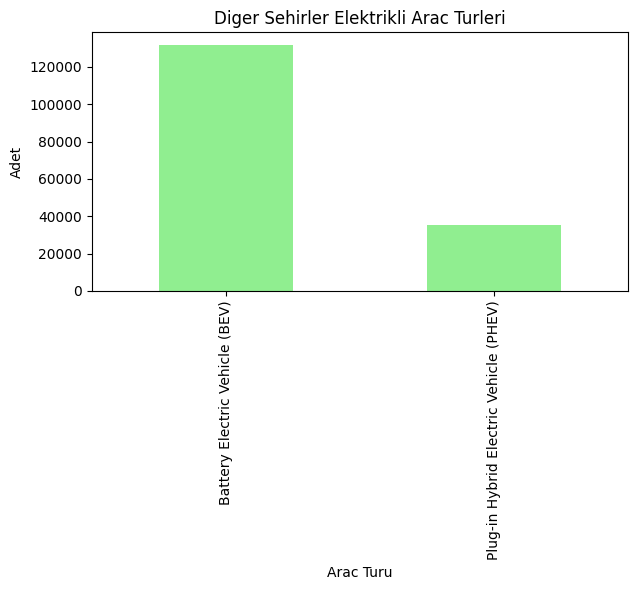

In [36]:
plt.figure(figsize=(12,6))

#Diger Sehirler icin grafik
plt.subplot(1,2,1)
other_cities_ev_type.plot(kind='bar', color='lightgreen')
plt.title('Diger Sehirler Elektrikli Arac Turleri')
plt.xlabel('Arac Turu')
plt.ylabel('Adet')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Adet')

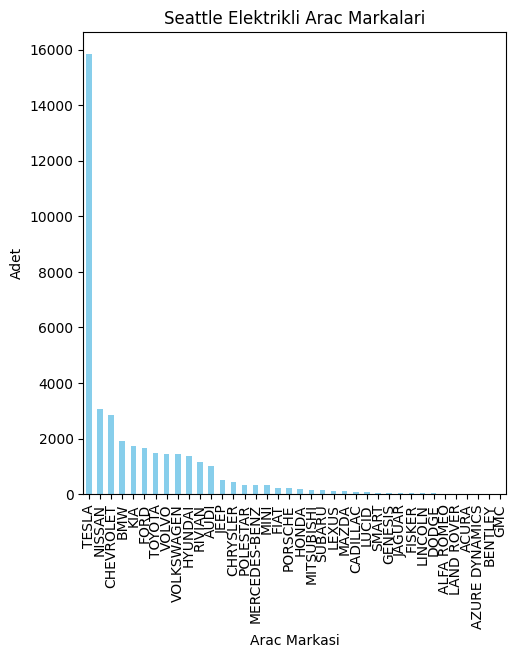

In [37]:
plt.figure(figsize=(12,6))

# Seattle icin grafik
plt.subplot(1,2,1)
seattle_make.plot(kind='bar', color='skyblue')
plt.title('Seattle Elektrikli Arac Markalari')
plt.xlabel('Arac Markasi')
plt.ylabel('Adet')

Text(0, 0.5, 'Adet')

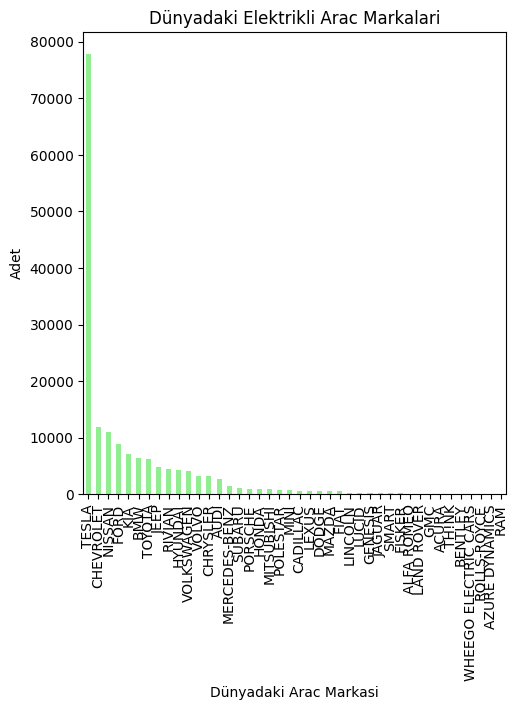

In [38]:
plt.figure(figsize=(12,6))

# Diger sehirler icin marka grafigi
plt.subplot(1,2,1)
other_cities_make.plot(kind='bar', color='lightgreen')
plt.title('D√ºnyadaki Elektrikli Arac Markalari')
plt.xlabel('D√ºnyadaki Arac Markasi')
plt.ylabel('Adet')

## 5.2 Tesla Ve Diƒüer Markalarƒ±n Kar≈üƒ±la≈ütrƒ±lmasƒ±

In [39]:
# Tesla araclarini ve digerlerini ayiriyoruz
tesla_cars = df_with_missing[df_with_missing['Make'] == 'TESLA']
non_tesla_cars = df_with_missing[df_with_missing['Make'] != 'TESLA']
nissan_cars = df_with_missing[df_with_missing['Make'] == 'NISSAN']
chevrolet_cars = df_with_missing[df_with_missing['Make'] == 'CHEVROLET']

# Ortalama karsilastirilmasi
features = ['Base MSRP', 'Electric Range']
comparison = {
    "Feature": [],
    "Tesla Average": [],
    "Non-Tesla Average": []
}

for feature in features:
    comparison["Feature"].append(feature)
    comparison["Tesla Average"].append(tesla_cars[feature].mean())
    comparison["Non-Tesla Average"].append(non_tesla_cars[feature].mean())

comparison_df = pd.DataFrame(comparison)
print(comparison_df)


          Feature  Tesla Average  Non-Tesla Average
0       Base MSRP    7081.336421        3907.165348
1  Electric Range     249.306836          93.181343


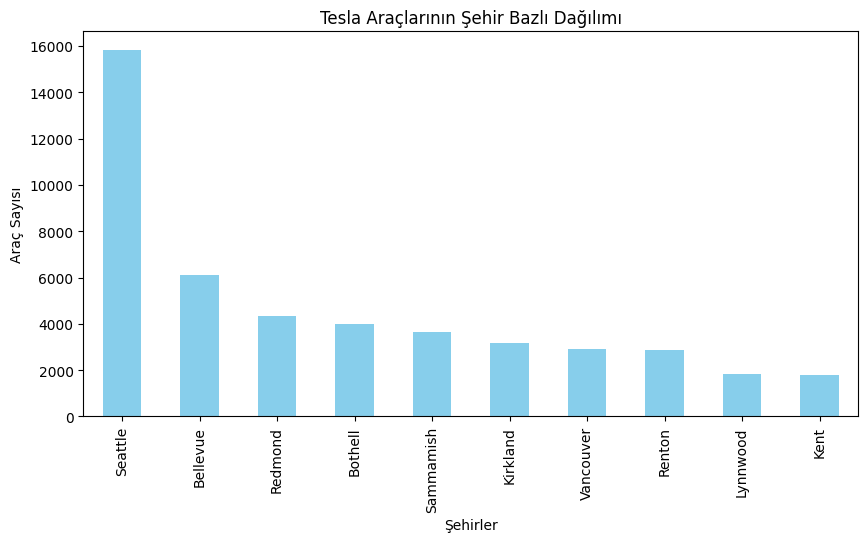

In [40]:
# Sehir bazinda Tesla sayilari
tesla_city_distribution = tesla_cars['City'].value_counts()

# G√∂rselle≈ütiriyoruz
tesla_city_distribution.head(10).plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title('Tesla Ara√ßlarƒ±nƒ±n ≈ûehir Bazlƒ± Daƒüƒ±lƒ±mƒ±')
plt.xlabel('≈ûehirler')
plt.ylabel('Ara√ß Sayƒ±sƒ±')
plt.show()


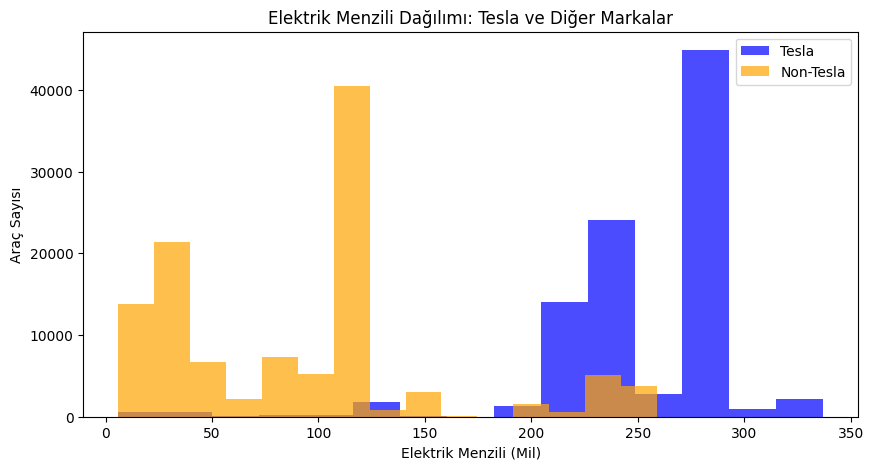

In [41]:
# Menzil karsilastirmasi
plt.figure(figsize=(10, 5))
plt.hist(tesla_cars['Electric Range'], bins=15, alpha=0.7, label='Tesla', color='blue')
plt.hist(non_tesla_cars['Electric Range'], bins=15, alpha=0.7, label='Non-Tesla', color='orange')
plt.title('Elektrik Menzili Daƒüƒ±lƒ±mƒ±: Tesla ve Diƒüer Markalar')
plt.xlabel('Elektrik Menzili (Mil)')
plt.ylabel('Ara√ß Sayƒ±sƒ±')
plt.legend()
plt.show()


### T√ºm ≈üehirlerde kullanƒ±m bakƒ±mƒ±ndan ilk 3'te olan markalarƒ±n menzil kar≈üƒ±la≈ütƒ±rƒ±lmasƒ±nƒ± yapƒ±yoruz.

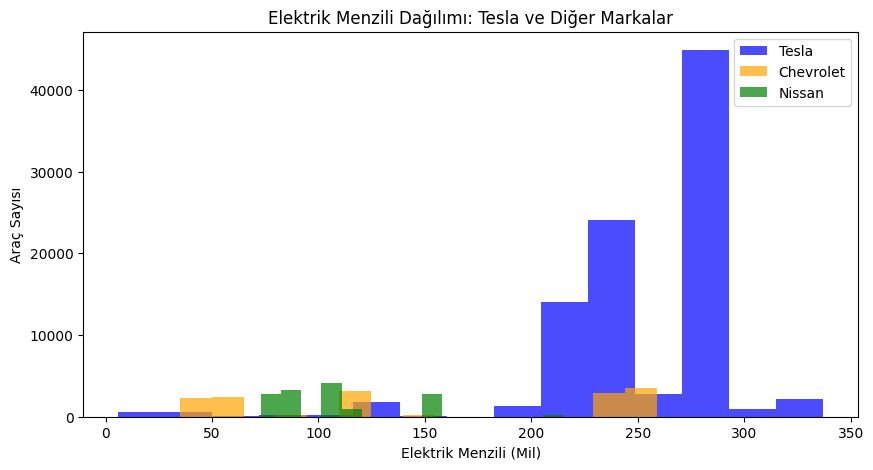

In [42]:
# Menzil karsilastirmasi
plt.figure(figsize=(10, 5))
plt.hist(tesla_cars['Electric Range'], bins=15, alpha=0.7, label='Tesla', color='blue')
plt.hist(chevrolet_cars['Electric Range'], bins=15, alpha=0.7, label='Chevrolet', color='orange')
plt.hist(nissan_cars['Electric Range'], bins=15, alpha=0.7, label='Nissan', color='green')
plt.title('Elektrik Menzili Daƒüƒ±lƒ±mƒ±: Tesla ve Diƒüer Markalar')
plt.xlabel('Elektrik Menzili (Mil)')
plt.ylabel('Ara√ß Sayƒ±sƒ±')
plt.legend()
plt.show()

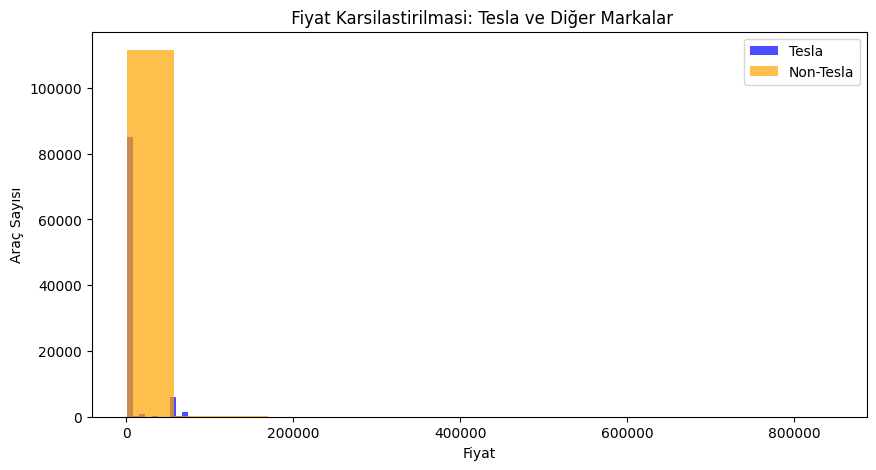

In [43]:
# Fiyat karsilastirmasi
plt.figure(figsize=(10, 5))
plt.hist(tesla_cars['Base MSRP'], bins=15, alpha=0.7, label='Tesla', color='blue')
plt.hist(non_tesla_cars['Base MSRP'], bins=15, alpha=0.7, label='Non-Tesla', color='orange')
plt.title(' Fiyat Karsilastirilmasi: Tesla ve Diƒüer Markalar')
plt.xlabel('Fiyat')
plt.ylabel('Ara√ß Sayƒ±sƒ±')
plt.legend()
plt.show()

### T√ºm ≈üehirlerde kullanƒ±m bakƒ±mƒ±ndan ilk 3'te olan markalarƒ±n fiyat kar≈üƒ±la≈ütƒ±rƒ±lmasƒ±nƒ± yapƒ±yoruz.

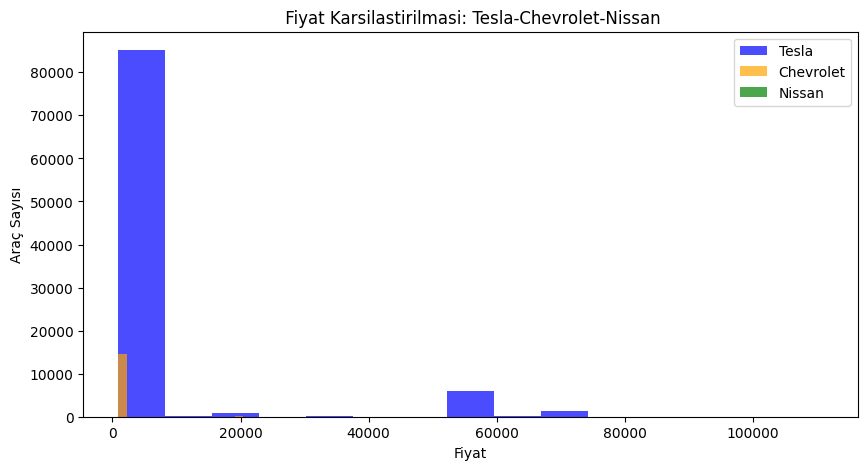

In [44]:
# Fiyat karsilastirmasi Tesla-Chevrolet-Nissan
plt.figure(figsize=(10, 5))
plt.hist(tesla_cars['Base MSRP'], bins=15, alpha=0.7, label='Tesla', color='blue')
plt.hist(chevrolet_cars['Base MSRP'], bins=15, alpha=0.7, label='Chevrolet', color='orange')
plt.hist(nissan_cars['Base MSRP'], bins=15, alpha=0.7, label='Nissan', color='green')
plt.title(' Fiyat Karsilastirilmasi: Tesla-Chevrolet-Nissan')
plt.xlabel('Fiyat')
plt.ylabel('Ara√ß Sayƒ±sƒ±')
plt.legend()
plt.show()

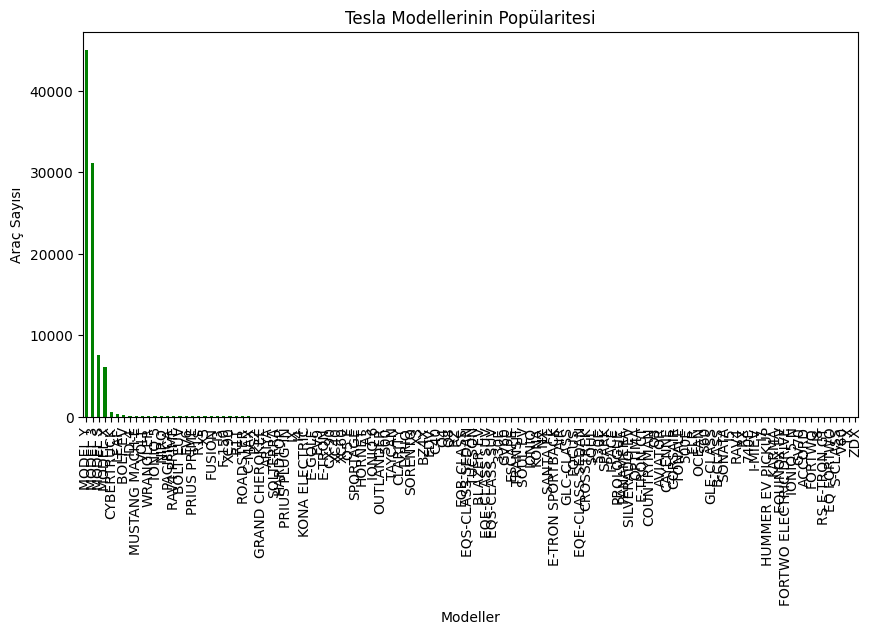

In [45]:
# Tesla modellerinin popularitesini buluyoruz
tesla_model_distribution = tesla_cars['Model'].value_counts()

# G√∂rselle≈ütiriyoruz
tesla_model_distribution.plot(kind='bar', color='green', figsize=(10, 5))
plt.title('Tesla Modellerinin Pop√ºlaritesi')
plt.xlabel('Modeller')
plt.ylabel('Ara√ß Sayƒ±sƒ±')
plt.show()


## 6. Sonu√ß Analiz Raporu  

### Proje Ba≈ülƒ±ƒüƒ±: Elektrikli Ara√ßlarƒ±n Pazardaki Durumu ve Tesla'nƒ±n Liderliƒüi  

### Projenin Amacƒ±
1. **Elektrikli ara√ßlarƒ±n ≈üehirler arasƒ± daƒüƒ±lƒ±mƒ±nƒ± analiz etmek.**
2. **Elektrikli ara√ßlar arasƒ±nda en yaygƒ±n markalarƒ± belirlemek.**
3. **Tesla'nƒ±n pazar liderliƒüinin nedenlerini anlamak.**
4. **Enerji altyapƒ±sƒ± yatƒ±rƒ±mlarƒ± i√ßin somut √∂neriler geli≈ütirmek.**
dƒ±k.  

---

### Proje S√ºreci ve Adƒ±mlarƒ±  

#### 1Ô∏è‚É£ Veri Hazƒ±rlƒ±ƒüƒ± ve Eksik Veri Y√∂netimi  
- Kaggle √ºzerinden elde edilen **Electric Vehicle Population Data** veri seti incelenmi≈ütir.  
- Veri setindeki eksik veriler tespit edilmi≈ü ve rastgele **NaN** deƒüerler eklenerek eksik veri y√∂netimi s√ºre√ßleri test edilmi≈ütir.  
- Eksik veriler, marka ve model bazƒ±nda doldurulmu≈ü, bu m√ºmk√ºn olmadƒ±ƒüƒ±nda genel ortalama deƒüerleri
- Veriyi manip√ºle edebilecek birka√ß s√ºtunun satƒ±rlarƒ±nda y√ºksek sayƒ±da "0" deƒüeri tespit edilmi≈ütir. ƒ∞lgili satƒ±rlarƒ±n muadil satƒ±rlarƒ±nda deƒüer bulunuyorsa o deƒüer ile, eƒüer muadil deƒüer yoksa ortalama deƒüer ile doldurulmu≈ütur.ullanƒ±lmƒ±≈ütƒ±r.  
- Bu s√ºre√ßler, verilerin analize uygun hale getirilmesini saƒülamƒ±≈ütƒ±r.  

#### 2Ô∏è‚É£ ≈ûehir Bazlƒ± Elektrikli ve Hibrit Ara√ß Analizi  
- Elektrikli ara√ßlarƒ±n ≈üehirler arasƒ± daƒüƒ±lƒ±mƒ±nda, **Seattle** en y√ºksek elektrikli ara√ß yoƒüunluƒüuna sahip ≈üehir olarak belirlenmi≈ütir.  
- Elektrikli ara√ßlarƒ±n hibrit ara√ßlara kƒ±yasla daha hƒ±zlƒ± bir ≈üekilde pop√ºlerlik kazandƒ±ƒüƒ± g√∂r√ºlm√º≈üt√ºr.  
- Bu analiz, elektrikli ara√ßlarƒ±n gelecekte daha b√ºy√ºk bir pazar payƒ± alacaƒüƒ±nƒ± ve fosil yakƒ±t sekt√∂r√ºne olan etkisini vurgulamƒ±≈ütƒ±r.  

#### 3Ô∏è‚É£ Elektrikli Ara√ß Markalarƒ±nƒ±n Daƒüƒ±lƒ±mƒ±  
- Elektrikli ara√ßlar arasƒ±nda en yaygƒ±n kullanƒ±lan markalar analiz edilmi≈ütir.  
- Tesla, hem **Seattle**'da hem de diƒüer ≈üehirlerde pazar lideri olarak √∂ne √ßƒ±kmƒ±≈ütƒ±r:  
  - **Seattle'da kullanƒ±lan Tesla ara√ßlarƒ±**, diƒüer t√ºm markalarƒ±n toplamƒ±ndan yakla≈üƒ±k 8 kat fazladƒ±r.  
  - En √ßok tercih edilen diƒüer markalar **Chevrolet** ve **Nissan** olarak sƒ±ralanmƒ±≈ütƒ±r.  

#### 4Ô∏è‚É£ Tesla‚Äônƒ±n Pazar Liderliƒüinin Nedenleri  
Tesla‚Äônƒ±n neden lider olduƒüu detaylƒ± bir ≈üekilde analiz edilmi≈ütir:  
- **Elektrik Menzili Avantajƒ±:** Tesla ara√ßlarƒ±nƒ±n menzili, rakiplerine kƒ±yasla olduk√ßa y√ºksektir.  
- **Fiyat-Performans Oranƒ±:** Tesla, ba≈ülangƒ±√ß fiyatlarƒ±na oranla "mil ba≈üƒ±na fiyat" analizinde √ºst√ºn performans g√∂stermektedir.  
- **Teknolojik Yenilikler:** Tesla'nƒ±n otonom s√ºr√º≈ü gibi yenilik√ßi teknolojileri, markayƒ± √∂ne √ßƒ±karmaktadƒ±r.  
- **Pop√ºler Modeller:** Tesla‚Äônƒ±n **Model 3** ve **Model Y** gibi uygun fiyatlƒ± modelleri, liderliƒüini peki≈ütiren fakt√∂rlerdir.  

---

### Sonu√ß ve √ñneriler  

#### üìù Sonu√ßlar  
1. Elektrikli ara√ß pazarƒ± hƒ±zla b√ºy√ºmekte, Tesla bu pazarƒ±n a√ßƒ±k ara lideri olarak konumlanmaktadƒ±r.  
2. Tesla'nƒ±n ba≈üarƒ±sƒ±nƒ±n temel nedenleri:  
   - **Elektrik menzili**  
   - **Fiyat-performans oranƒ±**  
   - **Teknolojik yenilikler**  
3. Elektrikli ara√ßlarƒ±n pop√ºlerliƒüi, hibrit ara√ßlarƒ±n ve fosil yakƒ±tlƒ± ara√ßlarƒ±n √∂n√ºne ge√ßmektedir.  

#### üí° √ñneriler  
1. Elektrikli ara√ß ≈üarj altyapƒ±sƒ±na yatƒ±rƒ±m yapƒ±labilir. √ñzellikle **Seattle** gibi elektrikli ara√ß kullanƒ±mƒ±nƒ±n yoƒüun olduƒüu b√∂lgelerde ≈üarj istasyonlarƒ± kurarak pazar payƒ± artƒ±rƒ±labilir.  
2. Elektrikli ara√ßlarla **entegre enerji √ß√∂z√ºmleri** geli≈ütirilmelidir.  
   - Evde kullanƒ±labilecek yenilenebilir enerji destekli ≈üarj cihazlarƒ± sunulabilir.  
   - Elektrikli ara√ß markalarƒ± ile i≈ü birliƒüi yapƒ±labilir.  
3. **Tesla gibi lider markalarla i≈ü birlikleri** kurularak ≈üarj altyapƒ±sƒ±nda avantaj saƒülanabilir ve marka prestiji artƒ±rƒ±labilir.  

---

### Notlar:  
- Bu analiz sonu√ßlarƒ±, yalnƒ±zca Washington eyaleti ve se√ßili veri setine dayanmaktadƒ±r.  
- Daha geni≈ü kapsamlƒ± bir analiz i√ßin farklƒ± eyaletlerden veya √ºlkelerden veri eklenebilir.  
- Gelecekte, enerji altyapƒ±sƒ±nƒ±n geli≈ütirilmesi ve kullanƒ±cƒ± davranƒ±≈ülarƒ±nƒ±n detaylƒ± analizi yapƒ±labilir.  
